In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ragbbb
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset


100%|██████████| 27.5M/27.5M [00:00<00:00, 49.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")

**exploration our data**

In [ ]:
data.shape

(991346, 24)

**for train model **

In [ ]:
subData=data.sample(n=10000,random_state=42)

In [ ]:
subData.shape

(10000, 24)

In [ ]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
subData.tail()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
755031,Male,50,170,75,81.0,1.2,1.2,1.0,1.0,101.0,...,112.0,77.0,14.9,1.0,1.3,28.0,24.0,22.0,1.0,N
961947,Female,55,155,50,63.0,0.8,0.9,1.0,1.0,98.0,...,106.0,115.0,13.2,1.0,0.6,21.0,14.0,10.0,3.0,N
685832,Male,55,160,60,85.0,0.9,0.8,1.0,1.0,121.0,...,85.0,69.0,15.3,1.0,0.9,45.0,36.0,26.0,2.0,N
868965,Female,40,165,55,71.0,1.0,0.8,1.0,1.0,108.0,...,128.0,55.0,13.9,1.0,0.9,21.0,15.0,14.0,1.0,N
652453,Male,25,170,60,74.0,1.2,1.2,1.0,1.0,102.0,...,113.0,180.0,15.6,1.0,1.2,28.0,26.0,22.0,1.0,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

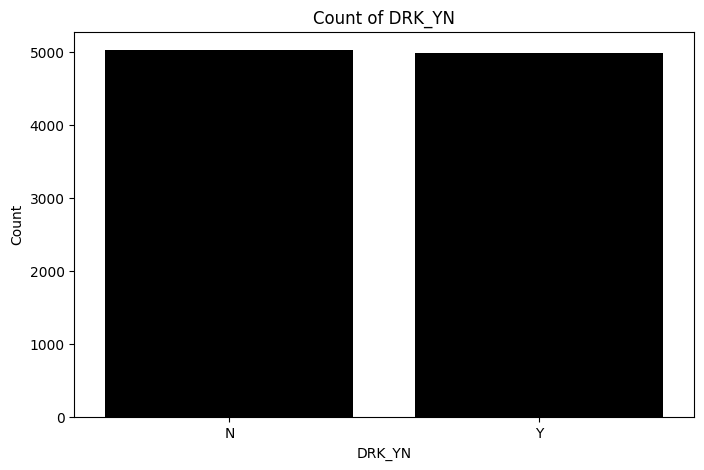

DRK_YN
N    5021
Y    4979
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='DRK_YN',data=subData,palette=['black','black'])
plt.xlabel('DRK_YN')
plt.ylabel('Count')
plt.title('Count of DRK_YN')
plt.show()
subData['DRK_YN'].value_counts()

In [ ]:
data['sex'].value_counts()

sex
Male      526415
Female    464931
Name: count, dtype: int64

In [ ]:
subData['sex'].value_counts()

sex
Male      5318
Female    4682
Name: count, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
subData['sex'] = label_encoder.fit_transform(subData['sex'])
subData['DRK_YN'] = label_encoder.fit_transform(subData['DRK_YN'])

In [ ]:
subData['sex'].value_counts()

sex
1    5318
0    4682
Name: count, dtype: int64

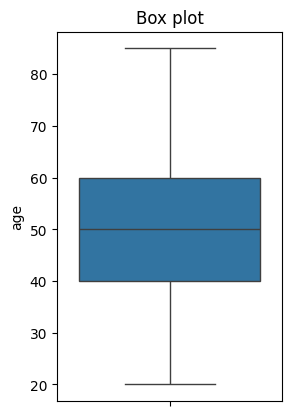

In [ ]:
plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(y=subData['age'])
plt.show()

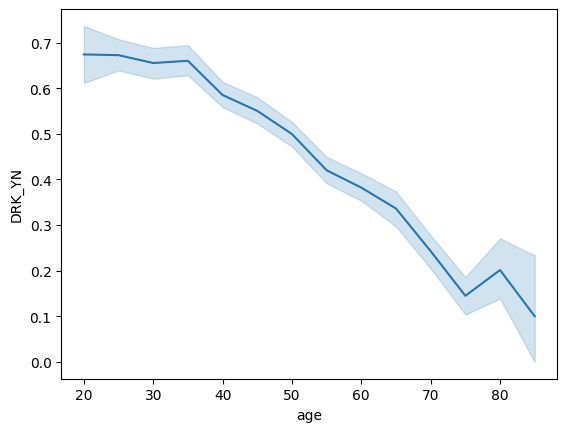

In [ ]:
sns.lineplot(x='age', y='DRK_YN', data=subData)
plt.show()

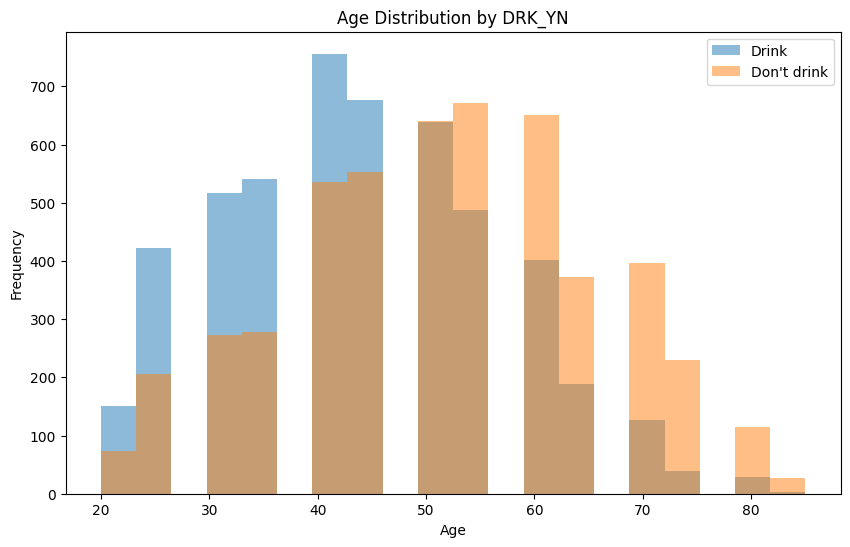

In [ ]:
# Filter data based on DRK_YN values
drk_1 = subData[subData['DRK_YN'] == 1]
drk_2 = subData[subData['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()

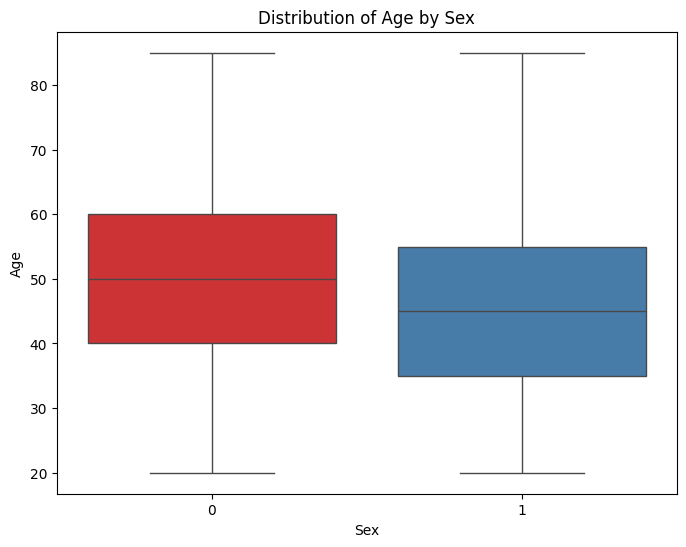

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=subData, palette='Set1')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Sex')
plt.show()

Text(0.5, 1.0, 'dis of hieght for each gender ')

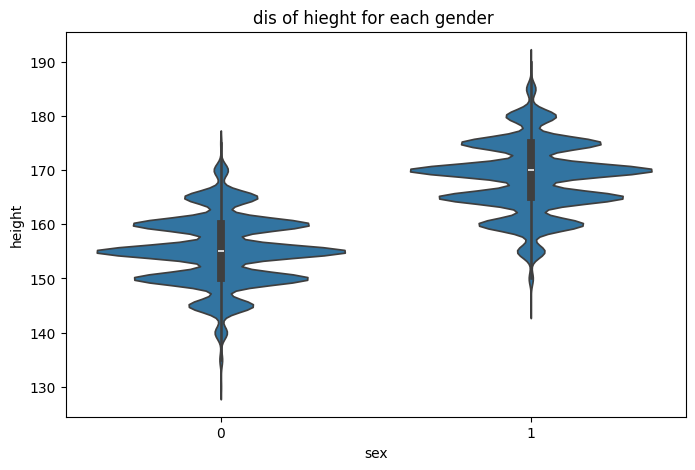

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='sex',y='height',data=subData)
plt.title("dis of hieght for each gender ")

Text(0.5, 1.0, 'boxplot for drinking and weight')

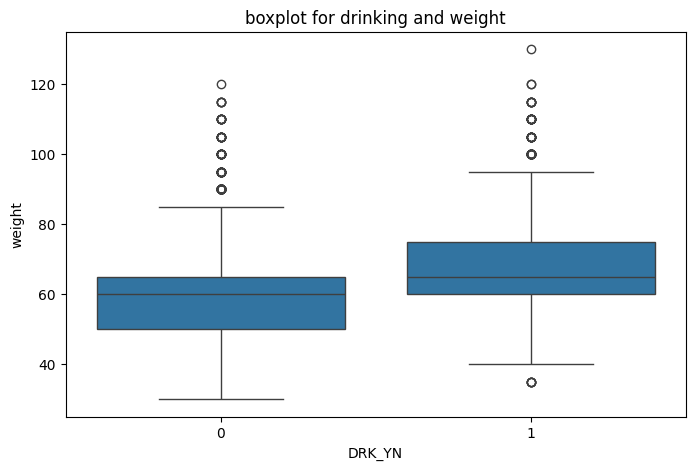

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DRK_YN', y='weight', data=subData)
plt.title("boxplot for drinking and weight")


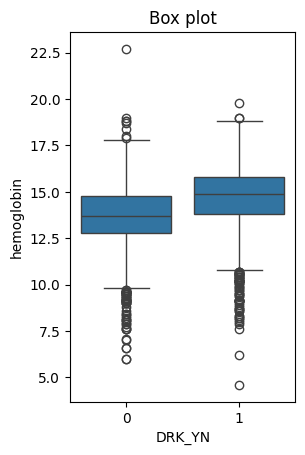

In [ ]:
plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x='DRK_YN',y='hemoglobin',data=subData)
plt.show()

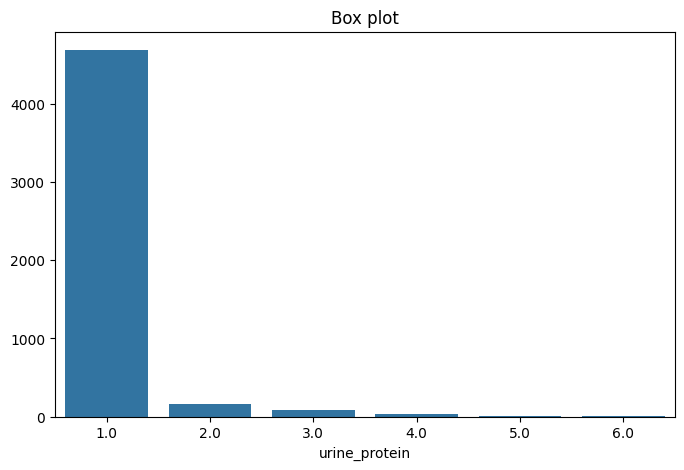

urine_protein
1.0    4690
2.0     163
3.0      79
4.0      36
5.0       9
6.0       2
Name: count, dtype: int64

In [ ]:
filtered_data = subData[subData['DRK_YN'] == 1]
x=filtered_data['urine_protein'].value_counts()
plt.figure(figsize=(8, 5))
plt.title('Box plot')
sns.barplot(x=x.index, y=x.values)
plt.show()
x

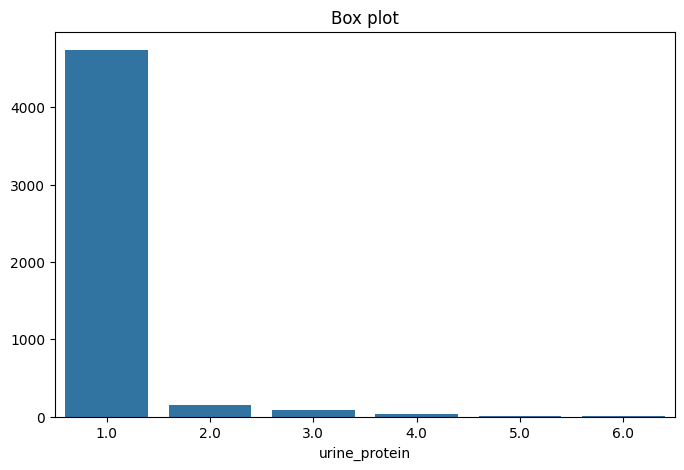

urine_protein
1.0    4741
2.0     156
3.0      84
4.0      32
5.0       6
6.0       2
Name: count, dtype: int64

In [ ]:
filtered_data = subData[subData['DRK_YN'] == 0]
y=filtered_data['urine_protein'].value_counts()
plt.figure(figsize=(8, 5))
plt.title('Box plot')
sns.barplot(x=y.index, y=y.values)
plt.show()
y

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

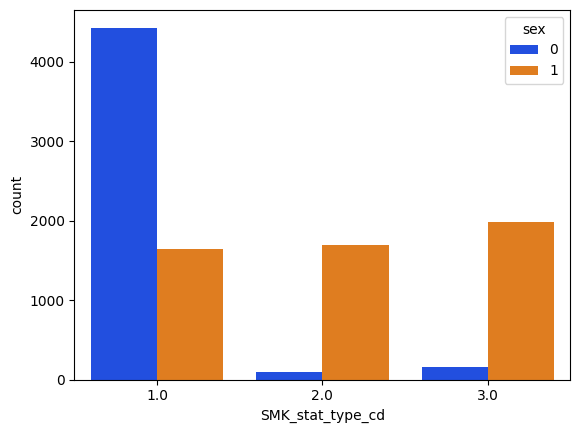

In [ ]:
sns.countplot(data = subData, x='SMK_stat_type_cd',hue='sex',palette='bright')

In [ ]:
subData['SMK_stat_type_cd'].value_counts()

SMK_stat_type_cd
1.0    6078
3.0    2134
2.0    1788
Name: count, dtype: int64

**cleaning **

In [ ]:
subData.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
subData.duplicated().sum()

0

In [ ]:
subData.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.531800,47.773500,162.243000,63.205500,81.146420,0.986930,0.973440,1.032000,1.030700,122.362000,...,113.008400,133.702500,14.240420,1.092900,0.856340,26.059200,26.171600,37.970000,1.605600,0.497900
std,0.499013,14.174812,9.249189,12.710564,9.645719,0.657699,0.587378,0.176009,0.172512,14.444072,...,34.619873,101.830832,1.589432,0.428588,0.285359,15.267665,33.308403,54.742418,0.815914,0.500021
min,0.000000,20.000000,130.000000,30.000000,55.000000,0.100000,0.100000,1.000000,1.000000,79.000000,...,1.000000,11.000000,4.600000,1.000000,0.100000,1.000000,3.000000,3.000000,1.000000,0.000000
25%,0.000000,40.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,...,90.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,1.000000,50.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000
75%,1.000000,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,162.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,130.000000,129.000000,9.900000,9.900000,2.000000,2.000000,220.000000,...,500.000000,1919.000000,22.700000,6.000000,10.300000,356.000000,2535.000000,999.000000,3.000000,1.000000


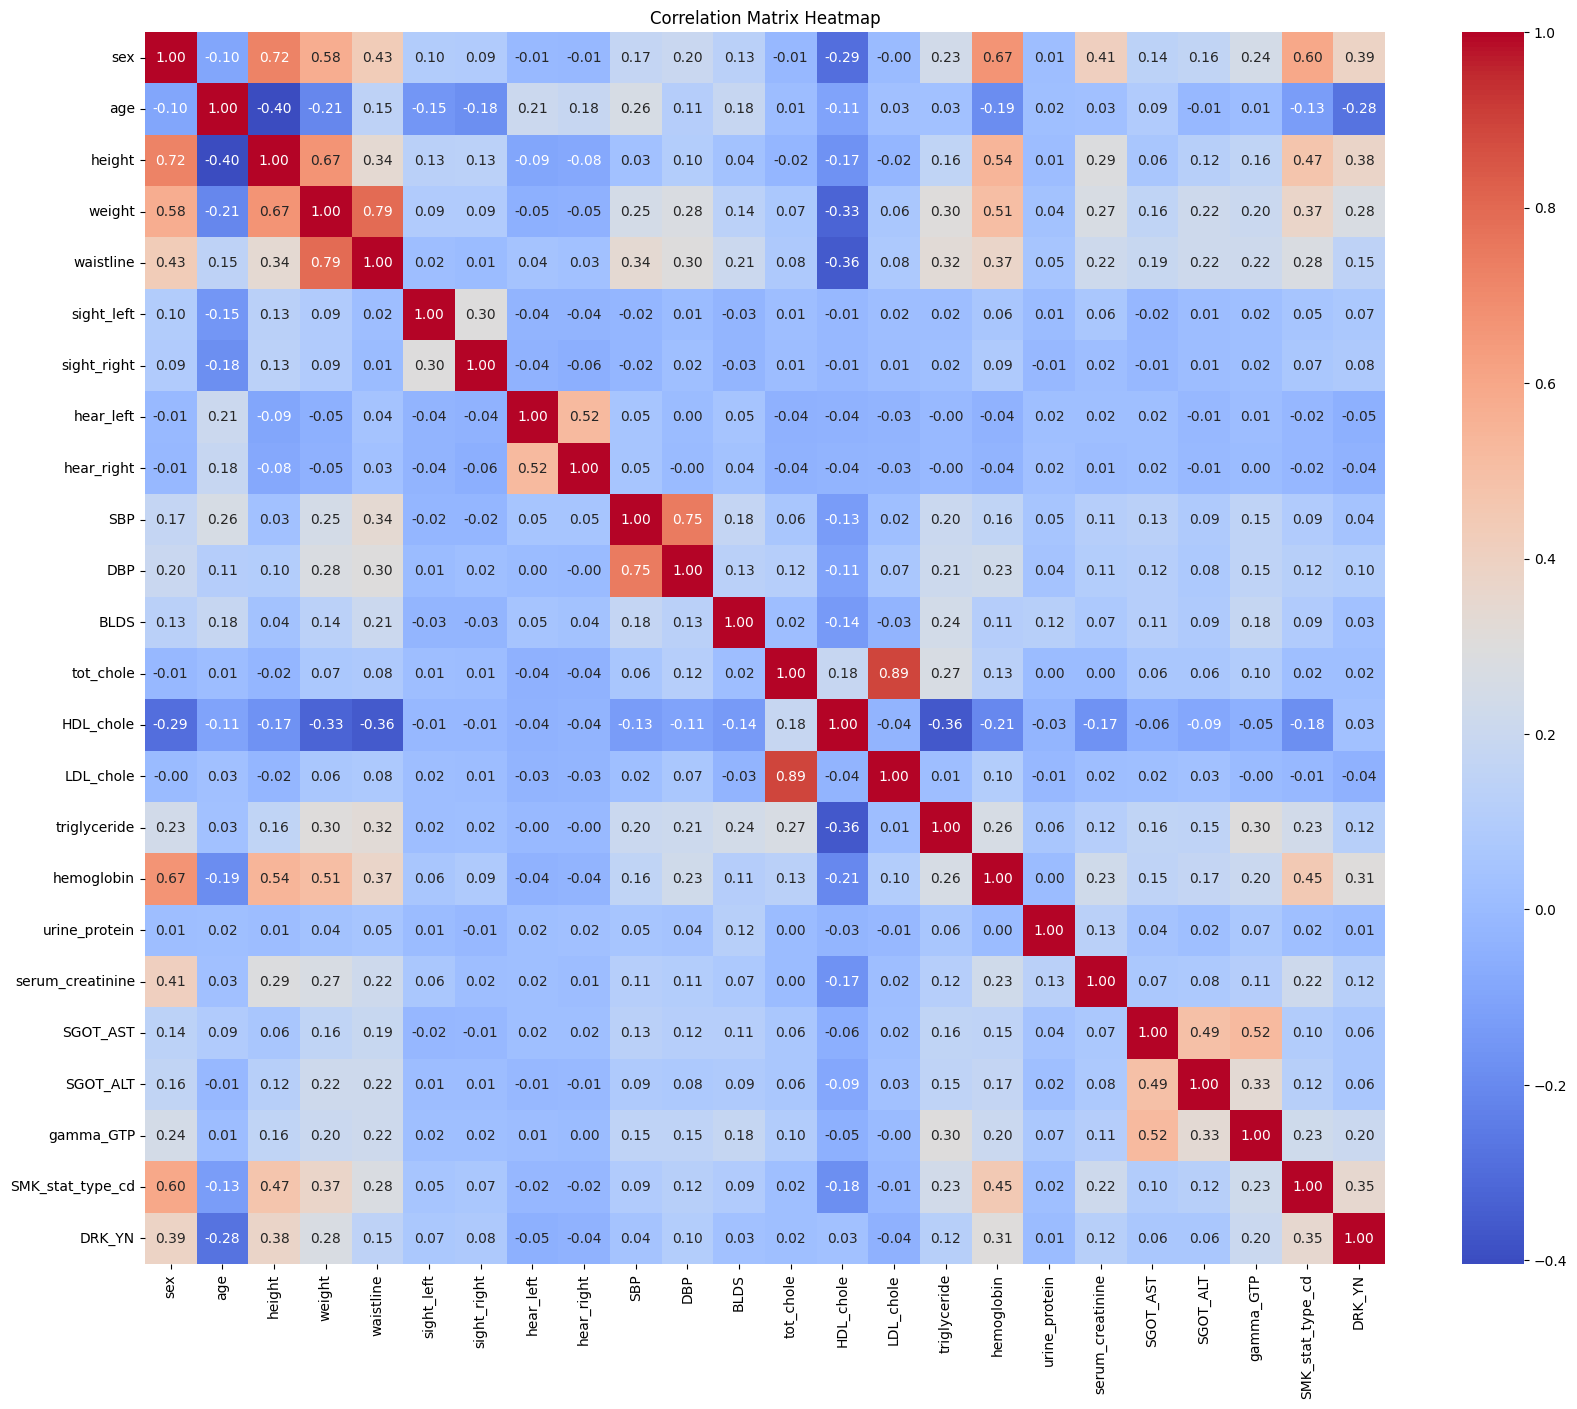

In [ ]:
corrMatrix=subData.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corrMatrix, annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

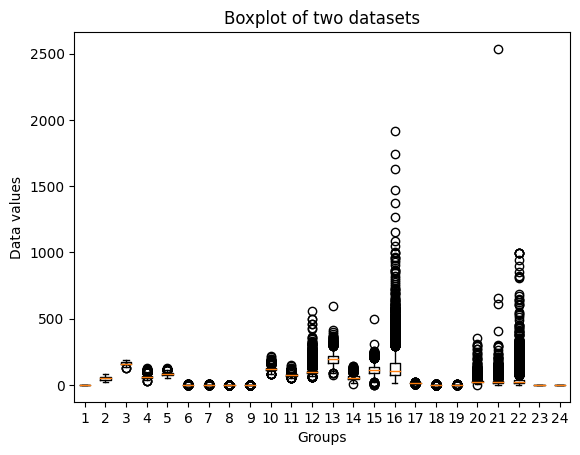

In [ ]:
plt.boxplot(subData)
plt.xlabel("Groups")
plt.ylabel("Data values")
plt.title("Boxplot of two datasets")
plt.show()

In [ ]:
'''
def remove_outliers(df, columns, k=1.5):

    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (the difference between the 75th and 25th percentiles)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Remove outliers by replacing them with NaN
        df[column] = df[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)

    return df

# Example usage:
# df = remove_outliers(df, ['column1', 'column2'])
'''

"\ndef remove_outliers(df, columns, k=1.5):\n\n    for column in columns:\n        # Calculate the first and third quartiles\n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n\n        # Calculate the interquartile range (the difference between the 75th and 25th percentiles)\n        iqr = q3 - q1\n\n        # Define the lower and upper bounds for outliers\n        lower_bound = q1 - k * iqr\n        upper_bound = q3 + k * iqr\n\n        # Remove outliers by replacing them with NaN\n        df[column] = df[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)\n\n    return df\n\n# Example usage:\n# df = remove_outliers(df, ['column1', 'column2'])\n"

In [ ]:
def transform_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return np.where(np.abs(z_scores) > threshold, data.mean(), data)

In [ ]:
# Apply the function to your data
transformed_data = transform_outliers_zscore(subData)

In [ ]:
# Convert the NumPy array back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=data.columns)

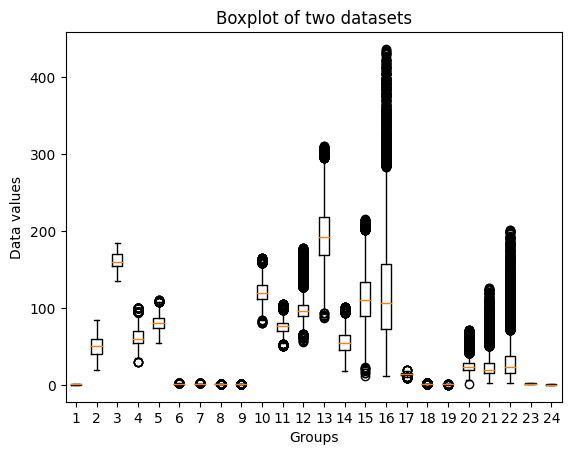

In [ ]:
plt.boxplot(transformed_df)
plt.xlabel("Groups")
plt.ylabel("Data values")
plt.title("Boxplot of two datasets")
plt.show()

In [ ]:
X = transformed_df.drop(['DRK_YN'], axis=1)
Y = transformed_df['DRK_YN']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(8000, 23)

In [ ]:
x_test.shape

(2000, 23)

In [ ]:
from sklearn.dummy import DummyClassifier
# it predicts the most frequent class in the training data regardless of the input features.
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(x_train, y_train)
baseline_accuracy = baseline_model.score(x_test,y_test)
baseline_accuracy

0.493

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
# Perform feature selection on the original data
select = SelectKBest(chi2,k=20)
x_train_select = select.fit_transform(x_train, y_train)
x_test_select = select.transform(x_test)


In [ ]:
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_select)
x_test_scaled=scaler.transform(x_test_select)

In [ ]:
svc.fit(x_train_scaled,y_train)
pre=svc.predict(x_test_scaled)
accuracy=accuracy_score(pre,y_test)
recall = recall_score(pre, y_test)
f1 = f1_score(pre, y_test)


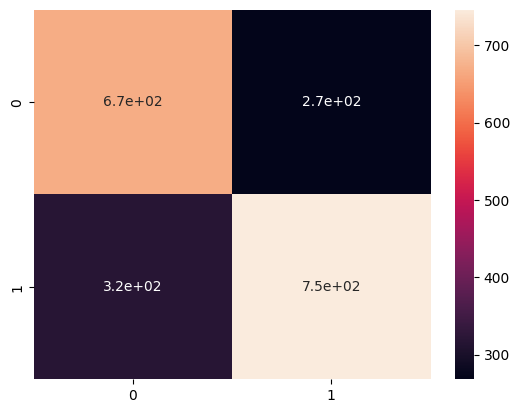

accuracy is: 0.7075 
 recall is: 0.7017873941674506 
 f1 score is: 0.718343765045739


In [ ]:

sns.heatmap(confusion_matrix(pre, y_test), annot=True)
plt.show()
print('accuracy is:', accuracy, '\n','recall is:', recall, '\n','f1 score is:', f1)


In [ ]:
classification_report(y_test,pre, output_dict=True)

{'0.0': {'precision': 0.7139807897545357,
  'recall': 0.678498985801217,
  'f1-score': 0.6957878315132605,
  'support': 986},
 '1.0': {'precision': 0.7017873941674506,
  'recall': 0.7357001972386588,
  'f1-score': 0.718343765045739,
  'support': 1014},
 'accuracy': 0.7075,
 'macro avg': {'precision': 0.7078840919609932,
  'recall': 0.7070995915199378,
  'f1-score': 0.7070657982794998,
  'support': 2000},
 'weighted avg': {'precision': 0.7077987381918835,
  'recall': 0.7075,
  'f1-score': 0.7072236898142271,
  'support': 2000}}

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

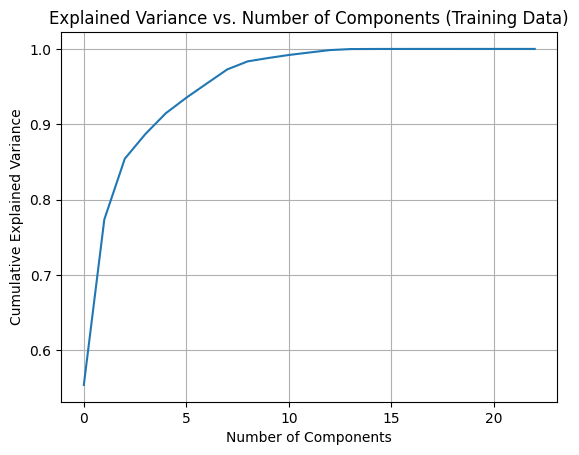

In [ ]:
pca=PCA()
pca.fit(x_train)
# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (Training Data)')
plt.grid(True)
plt.show()

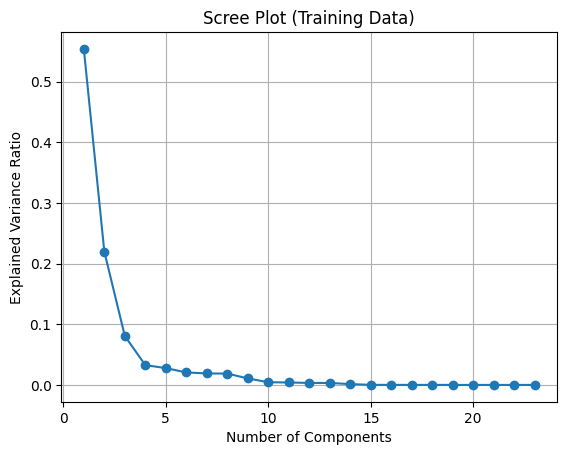

In [ ]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Training Data)')
plt.grid(True)
plt.show()

In [ ]:
pca=PCA(n_components=12)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.fit_transform(x_test_scaled)

In [ ]:
svc.fit(x_train_pca,y_train)
pre=svc.predict(x_test_pca)
accuracy=accuracy_score(pre,y_test)
recall = recall_score(pre, y_test)
f1 = f1_score(pre, y_test)

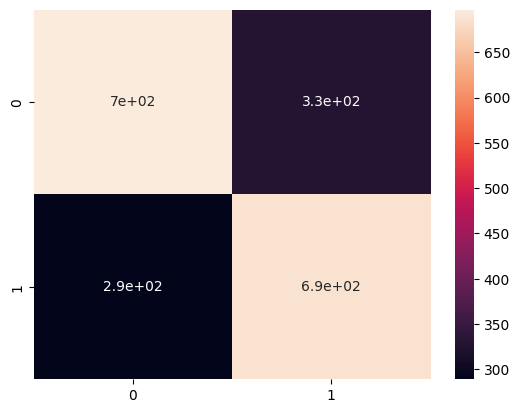

accuracy is:  0.6915 
 recall is:  0.7035897435897436 
 f1 score is:  0.6897938662644544


In [ ]:
sns.heatmap(confusion_matrix(pre, y_test), annot=True)
plt.show()
print('accuracy is: ', accuracy,'\n','recall is: ', recall,'\n','f1 score is: ', f1)


In [ ]:
classification_report(y_test,pre, output_dict=True)

{'0.0': {'precision': 0.68,
  'recall': 0.7068965517241379,
  'f1-score': 0.6931874689209349,
  'support': 986},
 '1.0': {'precision': 0.7035897435897436,
  'recall': 0.6765285996055227,
  'f1-score': 0.6897938662644544,
  'support': 1014},
 'accuracy': 0.6915,
 'macro avg': {'precision': 0.6917948717948719,
  'recall': 0.6917125756648304,
  'f1-score': 0.6914906675926946,
  'support': 2000},
 'weighted avg': {'precision': 0.69196,
  'recall': 0.6915,
  'f1-score': 0.6914669123740994,
  'support': 2000}}